<a href="https://colab.research.google.com/github/daekee0325/DataSciencePractices/blob/master/Nayak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pwd

/content


In [0]:
import pandas as pd
import numpy as np
import os

In [19]:
df_ge = pd.read_csv('ge.us.txt', header=0)
df_ge.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
14053,2017-11-06,20.52,20.530,20.08,20.13,60641787,0
14054,2017-11-07,20.17,20.250,20.12,20.21,41622851,0
14055,2017-11-08,20.21,20.320,20.07,20.12,39672190,0
14056,2017-11-09,20.04,20.071,19.85,19.99,50831779,0
14057,2017-11-10,19.98,20.680,19.90,20.49,100698474,0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

# 새 섹션

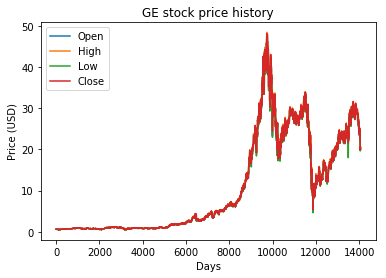

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(df_ge["Open"])
plt.plot(df_ge["High"])
plt.plot(df_ge["Low"])
plt.plot(df_ge["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

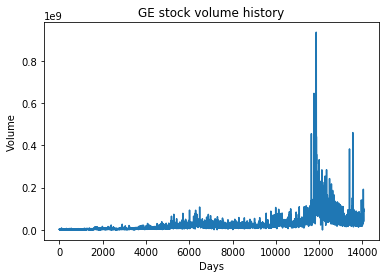

In [22]:
plt.figure()
plt.plot(df_ge["Volume"])
plt.title('GE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [0]:
print("checking if any null values are present\n", df_ge.isna().sum())

# Normalizing the Data

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ["Open","High","Low","Close","Volume"]
df_train, df_test = train_test_split(df_ge, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))
# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Train and Test size 11246 2812


In [25]:
x_train

array([[0.00356678, 0.00352766, 0.00358385, 0.00338425, 0.02108267],
       [0.00340607, 0.00319219, 0.00341628, 0.00338425, 0.01365459],
       [0.00340607, 0.00319219, 0.00323598, 0.00321827, 0.01758709],
       ...,
       [0.56738965, 0.56144866, 0.56900922, 0.56564471, 0.16041384],
       [0.56658613, 0.5678247 , 0.56695173, 0.57270398, 0.24217621],
       [0.57639752, 0.57292971, 0.57755734, 0.57677987, 0.25339457]])

In [0]:
from tqdm import tqdm_notebook
TIME_STEPS = 3
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y

In [0]:

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

## Now using the above functions lets form our train, validation and test datasets

In [28]:
BATCH_SIZE=20
x_t, y_t = build_timeseries(x_train, 3)
x_t = trim_dataset(x_t, BATCH_SIZE)
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(x_test, 3)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)


length of time-series i/o (11243, 3, 5) (11243,)



length of time-series i/o (2809, 3, 5) (2809,)


In [0]:
from keras.utils import plot_model

In [0]:
from tensorflow.keras.models import Sequential 

In [0]:
install.packages("keras")
library(keras)
install_keras()

In [0]:
!pip install --upgrade tensorflow

In [31]:
from keras.utils.visualize_util import to_graph
from tensorflow.keras.models import Sequential
to_graph(Sequential())

ModuleNotFoundError: ignored

In [0]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import adam

plot_model(Sequential())

# Creating Model

In [41]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, batch_input_shape=(BATCH_SIZE, TIME_STEPS, x_t.shape[2]), dropout=0.0, recurrent_dropout=0.0, stateful=True,     kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = adam(lr=0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)

W0730 07:44:39.217725 140537374664576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [42]:
csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'your_log_name' + '.log'), append=True)

history = model.fit(x_t, y_t, epochs=your_epochs, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)), callbacks=[csv_logger])

NameError: ignored